In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris_dirty.csv')

In [3]:
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


Part 1 : Fetching out the rows that are complete

In [4]:
df.isna().sum()

Unnamed: 0       0
Sepal.Length     8
Sepal.Width     11
Petal.Length     0
Petal.Width      0
Species          0
dtype: int64

In [12]:
df1 = df.dropna()

In [13]:
df1


,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
6,7,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...,...
141,142,6.9,3.1,5.1,2.3,virginica
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica


In [14]:
print("Percent of complete data :" , (df1.shape[0]/df.shape[0])*100)

Percent of complete data : 87.33333333333333


In [16]:
df1.iloc[:,:4] = df.iloc[:,:4].replace(np.inf,np.nan)
df1.iloc[:,:4] = df.iloc[:,:4].replace(np.nan,np.nan)

In [18]:
rule1 = df['Species'].apply(lambda x : True if(x=='Setosa' or x=='Versicolor' or x=='virginica') else False)
rule2 = df.iloc[:,:4].apply(lambda x : True if all(y>0 for y in x) else False ,axis=1)
rule3 = df.apply(lambda x : True if x["Petal.Length"]>=x["Petal.Width"] else False ,axis=1)
rule4 = df['Sepal.Length'].apply(lambda x : True if x<=30 else False)
rule5 = df.apply(lambda x : True if(x['Sepal.Length'] > x['Petal.Length']) else False,axis=1)

In [19]:
rule1

0       True
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: Species, Length: 150, dtype: bool

Visualizing Rules

In [20]:
df_rules = pd.DataFrame({'rule1':rule1,'rule2':rule2,'rule3':rule3,'rule4':rule4,'rule5':rule5})
df_rules = df_rules.replace(True,1)
df_rules = df_rules.replace(False,0)

In [21]:
df_rules

,rule1,rule2,rule3,rule4,rule5
0,1,1,1,1,1
1,0,1,1,1,1
2,0,1,1,1,1
3,0,1,1,1,1
4,0,0,1,0,0
...,...,...,...,...,...
145,1,1,1,1,1
146,1,1,1,1,1
147,1,1,1,1,1
148,1,1,1,1,1


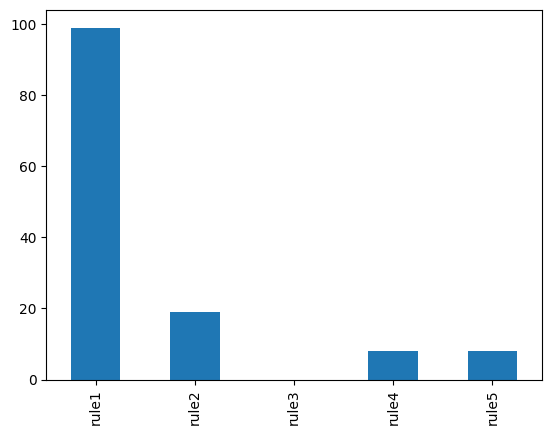

In [23]:
plt.figure()
df_rules.apply(lambda x : len(x)-x.sum() ,axis=0).plot(kind='bar')
plt.show()

<Axes: >

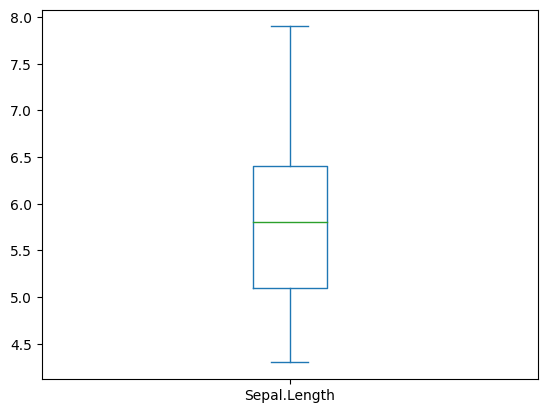

In [24]:
df['Sepal.Length'].plot(kind='box')